# Linear Regression Project
This notebook demonstrates a complete workflow for building a linear regression model to predict housing prices.


## Import Required Libraries
The following libraries are imported for data manipulation, visualization, and model development.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib

## Load Dataset
The dataset is loaded from a CSV file into a pandas DataFrame for further processing.

In [2]:
file_path = rfile_path = r"housing.csv"

df = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)
Perform an initial analysis of the dataset to understand its structure, data types, and summary statistics.

In [3]:
#=============== EDA ===============
print("===== EDA =====")
# 1. Dataset overview
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())


===== EDA =====
Dataset shape: (20640, 10)

First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Data types:
 lon

### Missing Values Analysis
Check for missing values in the dataset and document their counts.

In [4]:
# 2. Missing values analysis
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


## Data Cleaning
Handle missing values, outliers, and prepare the dataset for modeling.

In [5]:
#=============== DATA CLEANING ===============
print("\n===== Data Cleaning =====")

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Handle missing values for numeric columns
imputer = SimpleImputer(strategy='median')
df_numeric_cleaned = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Combine numeric and non-numeric columns back
df_cleaned = pd.concat([df_numeric_cleaned, df[non_numeric_cols].reset_index(drop=True)], axis=1)

# Handle outliers for numeric columns only
z_scores = np.abs((df_numeric_cleaned - df_numeric_cleaned.mean()) / df_numeric_cleaned.std())
df_clean = df_cleaned[(z_scores < 3).all(axis=1)]

print(f"Removed {len(df_cleaned) - len(df_clean)} outliers")

# Save cleaned data (optional)
df_clean.to_csv('cleaned_housing_data.csv', index=False)


===== Data Cleaning =====
Removed 894 outliers


## Data Visualization
Visualize the dataset to understand feature distributions and relationships.

<Figure size 1500x1000 with 0 Axes>

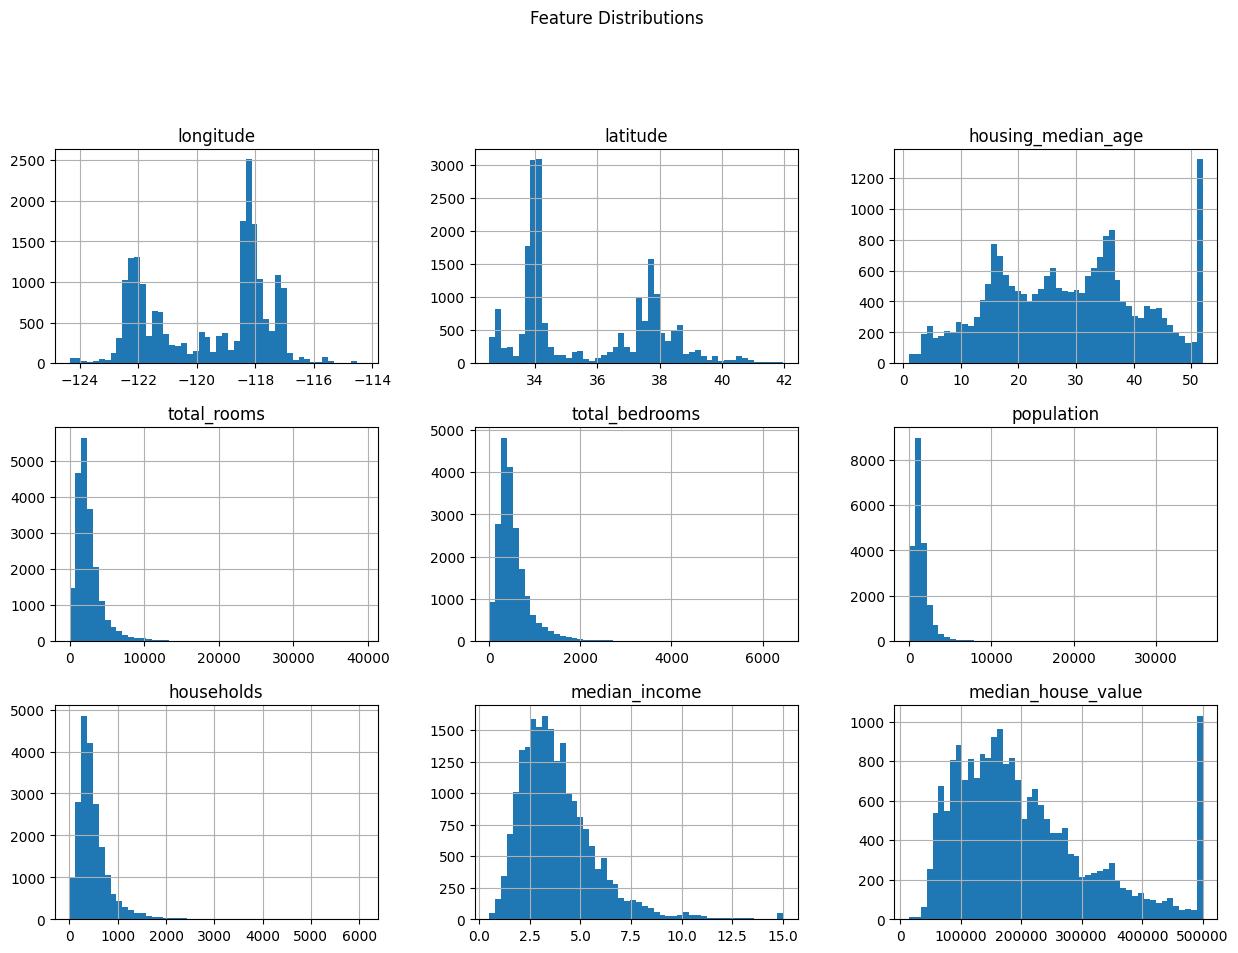

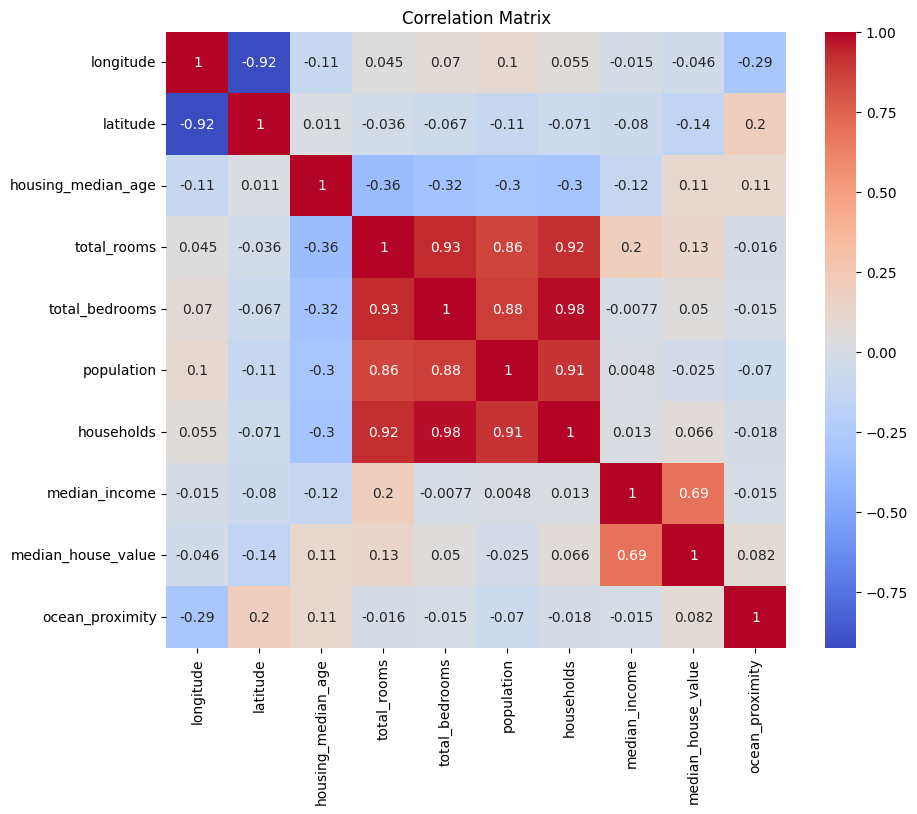

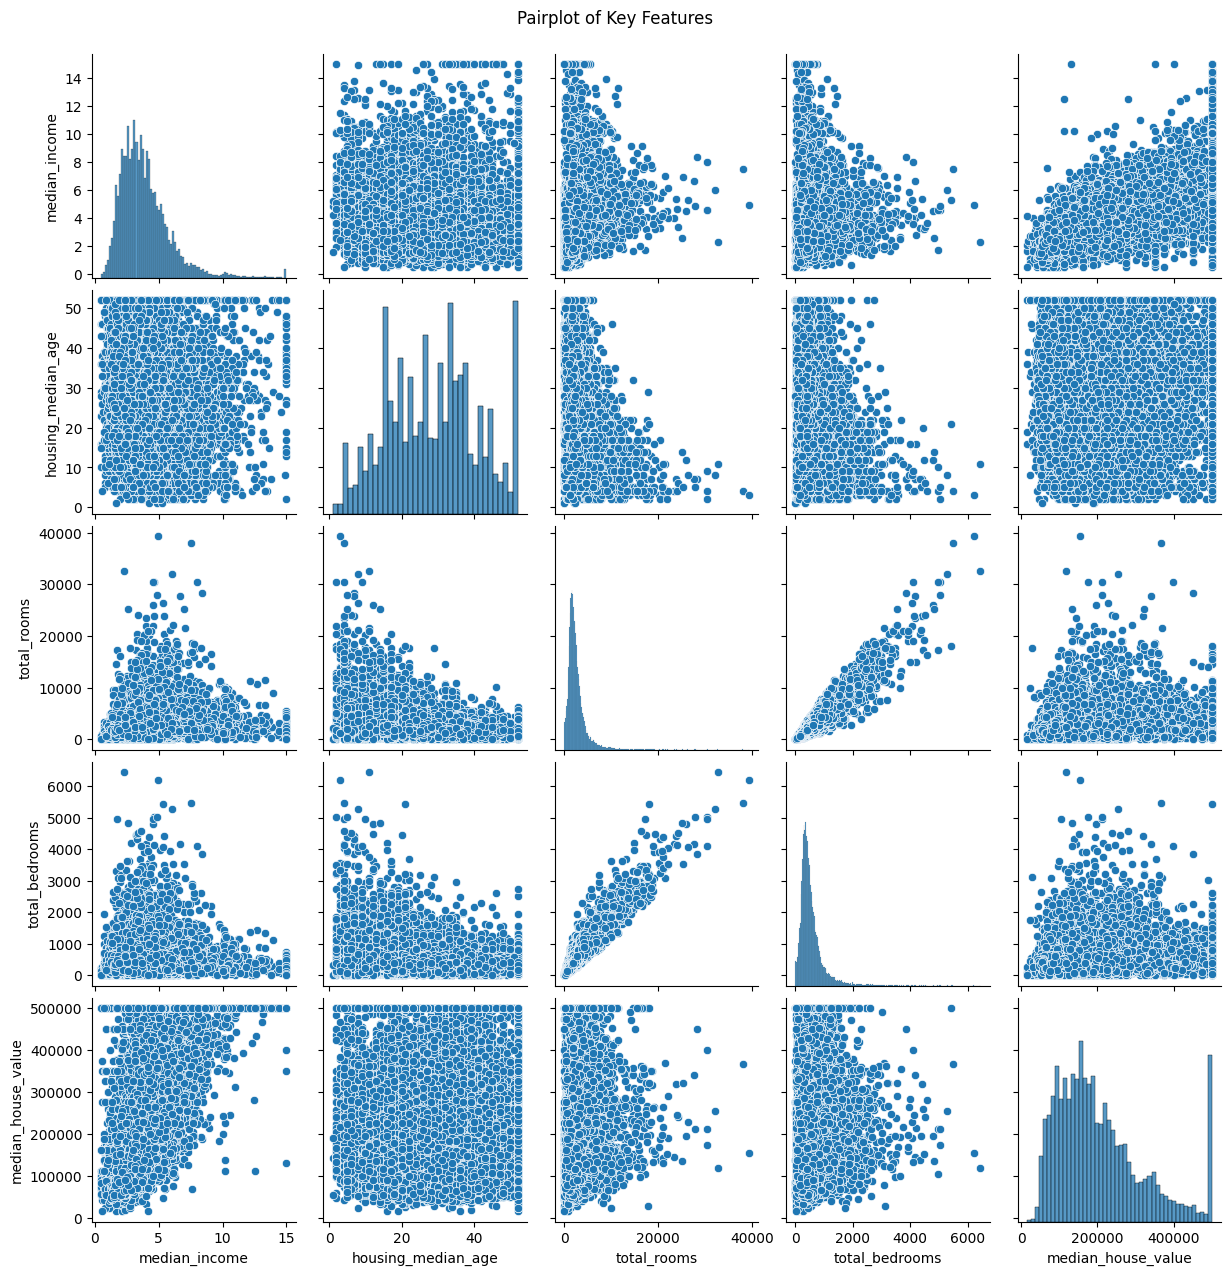

In [6]:
# 3. Visualizations
plt.figure(figsize=(15, 10))

# Histograms
df.hist(bins=50, figsize=(15, 10))
plt.suptitle('Feature Distributions', y=1.02)
plt.show()

# Encode categorical column
df_encoded = df.copy()
df_encoded['ocean_proximity'] = df_encoded['ocean_proximity'].astype('category').cat.codes

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter plots
sns.pairplot(df[['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'median_house_value']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

## Model Development
Split the data into training and testing sets, scale features, and train a linear regression model.

In [7]:
#=============== MODEL DEVELOPMENT ===============
# Split data FIRST to prevent leakage
X = df_clean.drop('median_house_value', axis=1)
y = df_clean['median_house_value']


In [8]:
# Encode categorical column
df_clean['ocean_proximity'] = df_clean['ocean_proximity'].astype('category').cat.codes

# Split data FIRST to prevent leakage
X = df_clean.drop('median_house_value', axis=1)
y = df_clean['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_6236\1908188537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ocean_proximity'] = df_clean['ocean_proximity'].astype('category').cat.codes


### Model Training
Train the linear regression model on the scaled training data.

In [9]:

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

c:\Users\Ahmed\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Intercept (B0): 201407.30064573343
Coefficient for longitude (B1): -77422.91260174336
Coefficient for latitude (B2): -83252.94345200919
Coefficient for housing_median_age (B3): 15530.182295458886
Coefficient for total_rooms (B4): -25412.397486823465
Coefficient for total_bedrooms (B5): 44558.24495887786
Coefficient for population (B6): -44418.909249281496
Coefficient for households (B7): 29531.43611782733
Coefficient for median_income (B8): 73581.62221745556
Coefficient for ocean_proximity (B9): -231.21819861378026


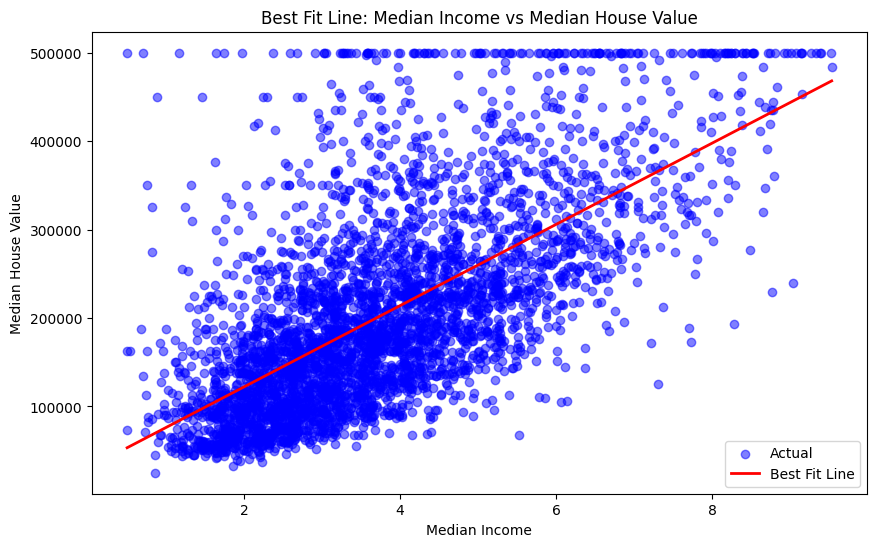

In [10]:
# Display regression coefficients
print("Intercept (B0):", model.intercept_)
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col} (B{i+1}): {model.coef_[i]}")
# Visualize best fit line for median_income vs median_house_value
feature = 'median_income'
feature_idx = X.columns.get_loc(feature)

plt.figure(figsize=(10, 6))
plt.scatter(X_test[feature], y_test, color='blue', alpha=0.5, label='Actual')

# Predict using only the median_income feature (keep others at mean)
X_test_mean = np.mean(X_test, axis=0).values  # Convert to numpy array
X_test_line = np.tile(X_test_mean, (len(X_test), 1))  # Repeat as rows
X_test_line[:, feature_idx] = X_test[feature]
X_test_line_scaled = scaler.transform(X_test_line)
y_pred_line = model.predict(X_test_line_scaled)

# Sort for a smooth line
sorted_idx = X_test[feature].argsort()
plt.plot(X_test[feature].iloc[sorted_idx], y_pred_line[sorted_idx], color='red', linewidth=2, label='Best Fit Line')

plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Best Fit Line: Median Income vs Median House Value')
plt.legend()
plt.show()

### Model Evaluation
Evaluate the model's performance using metrics such as R² score and Mean Squared Error (MSE).

In [11]:

# Evaluate
y_pred = model.predict(X_test_scaled)
print("\nModel Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
# Cross-validation for model robustness
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validated R² scores: {scores}")
print(f"Mean R² score: {scores.mean()}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")



Model Performance:
R² Score: 0.629
Cross-validated R² scores: [0.64203897 0.62625705 0.61317242 0.62245195 0.62421317]
Mean R² score: 0.6256267123252797
MSE: 4607392286.979


## Regression Diagnostics
Perform residual analysis, Q-Q plot, and check for multicollinearity using VIF.

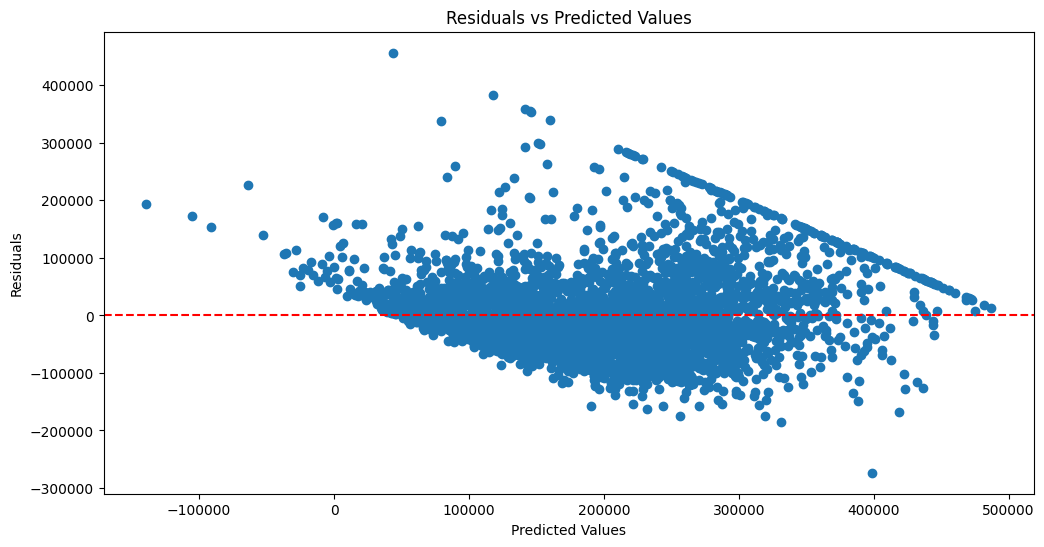

In [12]:
#=============== REGRESSION DIAGNOSTICS ===============
# 1. Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


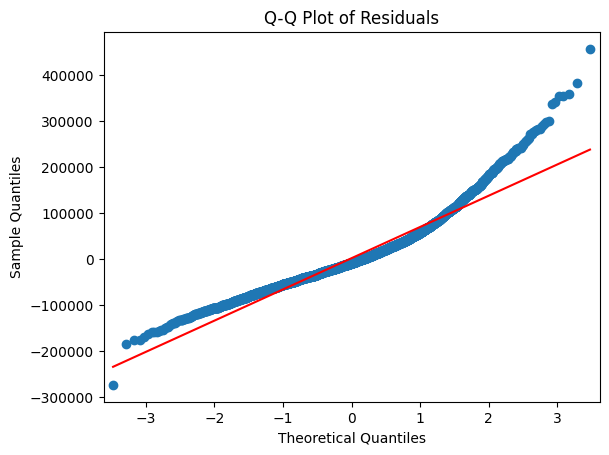

In [13]:
# 2. Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [14]:
# 3. VIF for multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                  for i in range(X.shape[1])]
print("\nVIF Scores:\n", vif_data)




VIF Scores:
               Feature         VIF
0           longitude  664.508257
1            latitude  579.479676
2  housing_median_age    7.706644
3         total_rooms   36.560719
4      total_bedrooms   78.373241
5          population   19.203764
6          households   85.305682
7       median_income   11.635710
8     ocean_proximity    1.790538


## Save Model Artifacts
Save the trained model and scaler for future use.

In [15]:
# Save model artifacts
joblib.dump(model, 'housing_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']